In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Import Data

In [5]:
input_data = pd.read_csv('Facebook_Ads_2.csv', encoding='ISO-8859-1')

In [11]:
clicked = len(input_data[input_data['Clicked'] == 1])

no_clicked = len(input_data) - clicked

clicked, no_clicked

(250, 249)

In [17]:
input_data.describe(include = 'all')

,Names,emails,Country,Time Spent on Site,Salary,Clicked
count,499,499,499,499.000000,499.000000,499.000000
unique,497,499,210,NaN,NaN,NaN
top,Walter,erat.Vivamus@ligula.co.uk,Mauritania,NaN,NaN,NaN
freq,2,1,6,NaN,NaN,NaN
mean,NaN,NaN,NaN,32.920178,52896.992469,0.501002
std,NaN,NaN,NaN,9.103455,18989.183150,0.500501
min,NaN,NaN,NaN,5.000000,20.000000,0.000000
25%,NaN,NaN,NaN,26.425044,38888.117260,0.000000
50%,NaN,NaN,NaN,33.196067,52840.913110,1.000000
75%,NaN,NaN,NaN,39.114995,65837.288190,1.000000


In [19]:
input_data_1 = input_data[['Time Spent on Site', 'Salary', 'Clicked']]

In [20]:
input_data_1

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


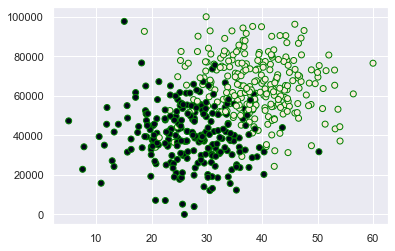

In [35]:
fig, ax = plt.subplots()

ax.scatter(x=input_data_1['Time Spent on Site'], y=input_data_1['Salary'], c = input_data_1['Clicked'], edgecolors='green')

In [48]:
df_in = input_data_1.copy()
df_in['Time'] = df_in['Time Spent on Site']
type(df_in['Time'])

pandas.core.series.Series

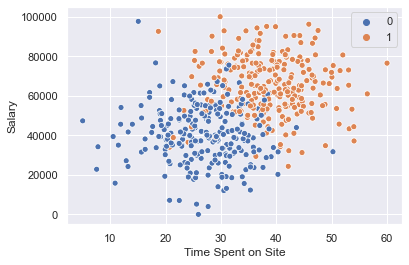

In [50]:

snsscp = sns.scatterplot(df_in['Time'].values, df_in['Salary'].values, hue = df_in['Clicked'].values)
snsscp.set(xlabel ='Time Spent on Site', ylabel = 'Salary')
plt.show()

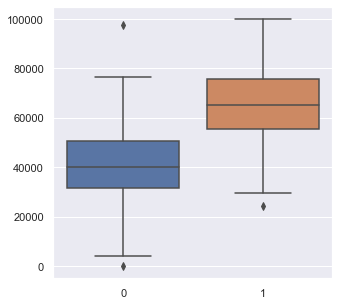

In [99]:
plt.figure(figsize = (5,5))
sns.boxplot(df_in['Clicked'].values, df_in['Salary'].values)
plt.show()

<AxesSubplot:>

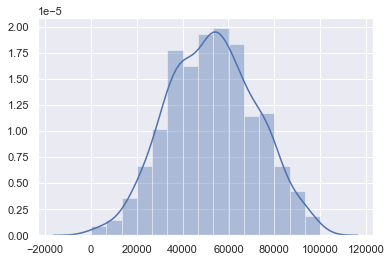

In [97]:
sns.distplot(df_in['Salary'].values)

In [60]:
X = input_data_1.drop('Clicked', axis = 1).values
y = input_data_1['Clicked'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
y_test

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [62]:
logi = LogisticRegression()
logi.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = logi.predict(X_test)

In [64]:
confusion_matrix(y_pred, y_test)

array([[ 0,  0],
       [61, 39]], dtype=int64)

## So why the issue is like this?

In [78]:
# Lets do standardizing now and then test
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = input_data_1.drop('Clicked', axis = 1).values
X = sc.fit_transform(X)

In [79]:
y = input_data_1['Clicked'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [80]:
logi_2 = LogisticRegression()
logi_2.fit(X_train, y_train)

LogisticRegression()

In [81]:
y_pred = logi_2.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[54,  1],
       [ 7, 38]], dtype=int64)

<AxesSubplot:>

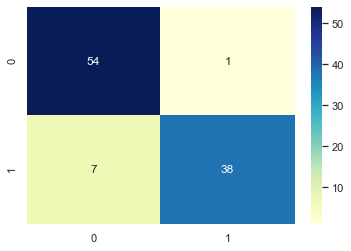

In [85]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')

In [88]:
print(classification_report(y_pred, y_test))

precision    recall  f1-score   support

           0       0.89      0.98      0.93        55
           1       0.97      0.84      0.90        45

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.93      0.92      0.92       100



In [89]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

In [93]:
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step = 0.1),
                     np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step = 0.1))

(-3.787379255660188, 3.412620744339818)

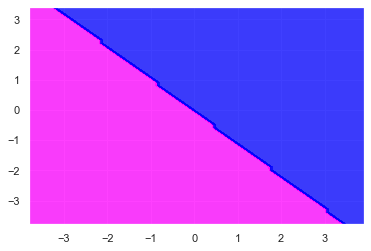

In [95]:
plt.contourf(X1, X2, logi_2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75,
 cmap = ListedColormap(('magenta', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())